## Softmax Classification (input : 2, class : 3) : Keras

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

### plot the data

In [ ]:
def plot_scatter(X, y):
    # 마커와 컬러맵을 준비합니다
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 클래스 샘플을 표시합니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap.colors[idx],
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

### plot the decision boundary

In [ ]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict_classes(np.array([xx1.ravel(), xx2.ravel()]).T)
    print(xx1.shape, Z.shape)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    plot_scatter(X, y)

### Step 1. Data (Generation, Plot)

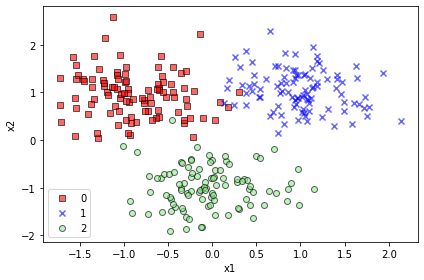

In [ ]:
m1 = [-1, 1]
cov1 = [[0.2, 0],[0, 0.2]]

m2 = [1, 1]
m3 = [0, -1]

x1 = np.random.multivariate_normal(m1, cov1, 100)
x2 = np.random.multivariate_normal(m2, cov1, 100)
x3 = np.random.multivariate_normal(m3, cov1, 100)
x_data = np.concatenate((x1, x2), axis=0)
x_data = np.concatenate((x_data, x3), axis=0)

y1 = np.ones((100, ), dtype='i')-1
y2 = 2*np.ones((100, ), dtype='i')-1
y3 = 3*np.ones((100, ), dtype='i')-1
y = np.concatenate((y1, y2), axis=0)
y = np.concatenate((y, y3), axis=0)

y_data = tf.keras.utils.to_categorical(y)

plot_scatter(x_data, y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

### Step 2. Softmax Classification Model (input = 2, output = 3 with softmax function)

In [ ]:
nb_classes = 3

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(3, input_shape=(2,)))
model.add(tf.keras.layers.Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 9         
_________________________________________________________________
activation_1 (Activation)    (None, 3)                 0         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


### Step 3. Loss,Optimizer, Metric

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

### Step 4. Train the model

In [ ]:
history = model.fit(x_data, y_data, epochs=500)

Epoch 1/500
10/10 [==============================] - 0s 1ms/step - loss: 1.8009 - accuracy: 0.0367
Epoch 2/500
10/10 [==============================] - 0s 2ms/step - loss: 1.7093 - accuracy: 0.0367
Epoch 3/500
10/10 [==============================] - 0s 1ms/step - loss: 1.6212 - accuracy: 0.0367
Epoch 4/500
10/10 [==============================] - 0s 2ms/step - loss: 1.5366 - accuracy: 0.0500
Epoch 5/500
10/10 [==============================] - 0s 2ms/step - loss: 1.4577 - accuracy: 0.0667
Epoch 6/500
10/10 [==============================] - 0s 2ms/step - loss: 1.3838 - accuracy: 0.0900
Epoch 7/500
10/10 [==============================] - 0s 2ms/step - loss: 1.3145 - accuracy: 0.1167
Epoch 8/500
10/10 [==============================] - 0s 1ms/step - loss: 1.2496 - accuracy: 0.1567
Epoch 9/500
10/10 [==============================] - 0s 2ms/step - loss: 1.1889 - accuracy: 0.1800
Epoch 10/500
10/10 [==============================] - 0s 2ms/step - loss: 1.1321 - accuracy: 0.2267
Epoch 11/

10/10 [==============================] - 0s 2ms/step - loss: 0.2530 - accuracy: 0.9767
Epoch 84/500
10/10 [==============================] - 0s 2ms/step - loss: 0.2509 - accuracy: 0.9767
Epoch 85/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2489 - accuracy: 0.9767
Epoch 86/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2470 - accuracy: 0.9767
Epoch 87/500
10/10 [==============================] - 0s 2ms/step - loss: 0.2451 - accuracy: 0.9767
Epoch 88/500
10/10 [==============================] - 0s 2ms/step - loss: 0.2432 - accuracy: 0.9767
Epoch 89/500
10/10 [==============================] - 0s 2ms/step - loss: 0.2413 - accuracy: 0.9767
Epoch 90/500
10/10 [==============================] - 0s 3ms/step - loss: 0.2395 - accuracy: 0.9767
Epoch 91/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2377 - accuracy: 0.9767
Epoch 92/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2360 - accuracy: 0.9767
Epoch 93/500


10/10 [==============================] - 0s 1ms/step - loss: 0.1648 - accuracy: 0.9767
Epoch 165/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1642 - accuracy: 0.9800
Epoch 166/500
10/10 [==============================] - 0s 945us/step - loss: 0.1637 - accuracy: 0.9800
Epoch 167/500
10/10 [==============================] - 0s 978us/step - loss: 0.1631 - accuracy: 0.9800
Epoch 168/500
10/10 [==============================] - 0s 941us/step - loss: 0.1625 - accuracy: 0.9800
Epoch 169/500
10/10 [==============================] - 0s 986us/step - loss: 0.1620 - accuracy: 0.9800
Epoch 170/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1615 - accuracy: 0.9800
Epoch 171/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1609 - accuracy: 0.9800
Epoch 172/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1604 - accuracy: 0.9800
Epoch 173/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1599 - accuracy: 0.9

10/10 [==============================] - 0s 1ms/step - loss: 0.1326 - accuracy: 0.9800
Epoch 246/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1323 - accuracy: 0.9800
Epoch 247/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1320 - accuracy: 0.9800
Epoch 248/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1318 - accuracy: 0.9800
Epoch 249/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1315 - accuracy: 0.9800
Epoch 250/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1312 - accuracy: 0.9800
Epoch 251/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1310 - accuracy: 0.9800
Epoch 252/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1307 - accuracy: 0.9800
Epoch 253/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1304 - accuracy: 0.9800
Epoch 254/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1302 - accuracy: 0.9800
Epoc

10/10 [==============================] - 0s 3ms/step - loss: 0.1153 - accuracy: 0.9800
Epoch 327/500
10/10 [==============================] - 0s 2ms/step - loss: 0.1151 - accuracy: 0.9800
Epoch 328/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1150 - accuracy: 0.9800
Epoch 329/500
10/10 [==============================] - 0s 2ms/step - loss: 0.1148 - accuracy: 0.9800
Epoch 330/500
10/10 [==============================] - 0s 2ms/step - loss: 0.1146 - accuracy: 0.9800
Epoch 331/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1145 - accuracy: 0.9800
Epoch 332/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1143 - accuracy: 0.9800
Epoch 333/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1142 - accuracy: 0.9800
Epoch 334/500
10/10 [==============================] - 0s 2ms/step - loss: 0.1140 - accuracy: 0.9800
Epoch 335/500
10/10 [==============================] - 0s 2ms/step - loss: 0.1138 - accuracy: 0.9800
Epoc

10/10 [==============================] - 0s 919us/step - loss: 0.1043 - accuracy: 0.9767
Epoch 408/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1042 - accuracy: 0.9767
Epoch 409/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1041 - accuracy: 0.9767
Epoch 410/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1040 - accuracy: 0.9767
Epoch 411/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1039 - accuracy: 0.9767
Epoch 412/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1038 - accuracy: 0.9767
Epoch 413/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1037 - accuracy: 0.9767
Epoch 414/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1036 - accuracy: 0.9767
Epoch 415/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1034 - accuracy: 0.9767
Epoch 416/500
10/10 [==============================] - 0s 2ms/step - loss: 0.1033 - accuracy: 0.9767
Ep

10/10 [==============================] - 0s 2ms/step - loss: 0.0967 - accuracy: 0.9767
Epoch 488/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0966 - accuracy: 0.9767
Epoch 489/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0966 - accuracy: 0.9767
Epoch 490/500
10/10 [==============================] - 0s 3ms/step - loss: 0.0965 - accuracy: 0.9767
Epoch 491/500
10/10 [==============================] - 0s 3ms/step - loss: 0.0964 - accuracy: 0.9767
Epoch 492/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0963 - accuracy: 0.9767
Epoch 493/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0962 - accuracy: 0.9767
Epoch 494/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0962 - accuracy: 0.9767
Epoch 495/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0961 - accuracy: 0.9767
Epoch 496/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0960 - accuracy: 0.9767
Epoc

### Plot the Training loss

dict_keys(['loss', 'accuracy'])


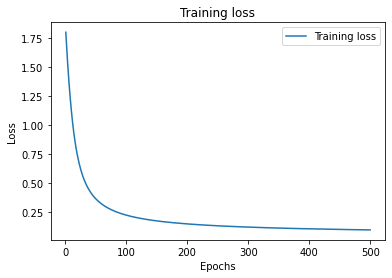

In [ ]:
#print(model.predict_classes(x_data))

history_dict = history.history
print(history_dict.keys())

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, '-', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Plot the Training Accuracy

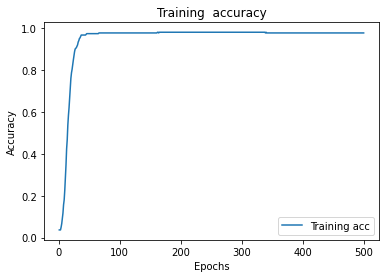

In [ ]:
plt.clf()   # 그래프를 초기화합니다
acc = history.history['accuracy']

plt.plot(epochs, acc, '-', label='Training acc')
plt.title('Training  accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Plot the Decision Boundary

(325, 293) (95225,)


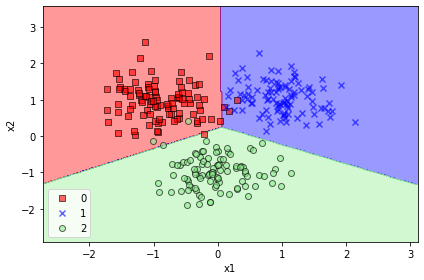

In [ ]:
plot_decision_regions(x_data, y, model)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()